In [1]:
import pandas as pd
from neuralprophet.neural_prophet import NeuralProphet

In [2]:
df = pd.read_csv('../data/example_wp_log_peyton_manning.csv')

# Seasonality

##  Additive Seasonality

In [3]:
m = NeuralProphet()
m.fit(df)

Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


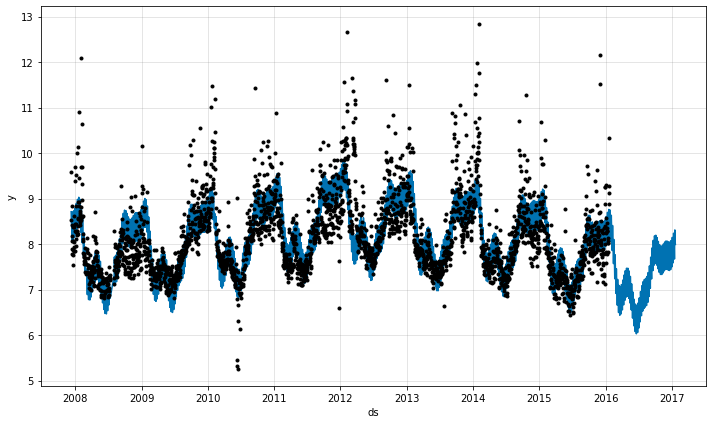

In [4]:
forecast = m.predict(future_periods=365)
fig_fit = m.plot(forecast)

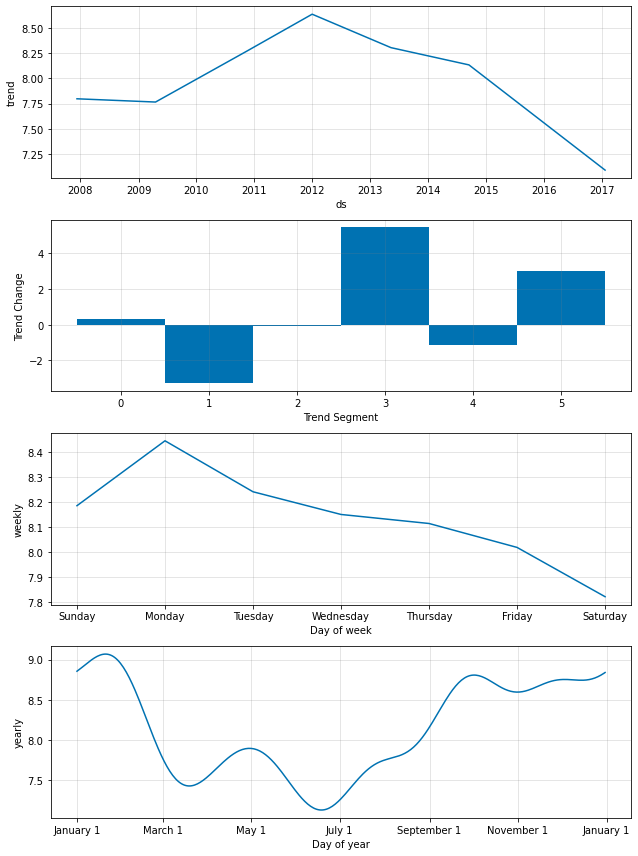

In [5]:
fig_comp = m.plot_components(forecast)

##  Multiplicative Seasonality
Clearly, additive seasonality is the better fit for this data.

In [6]:
m = NeuralProphet(
#     n_changepoints=0, 
    seasonality_mode='multiplicative',
)
m.fit(df)

Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


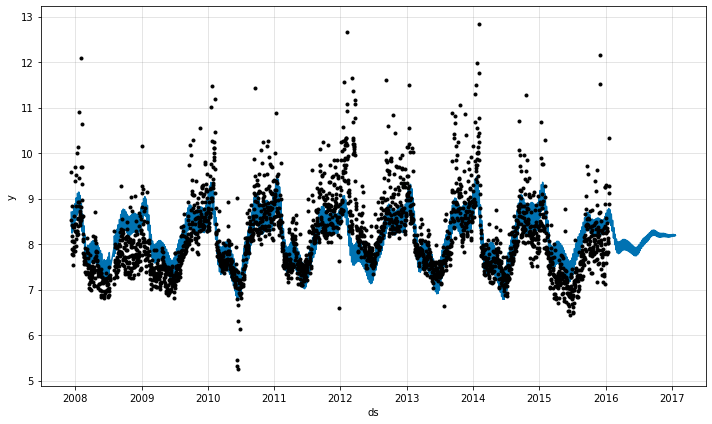

In [7]:
forecast = m.predict(future_periods=365)
fig_fit = m.plot(forecast)

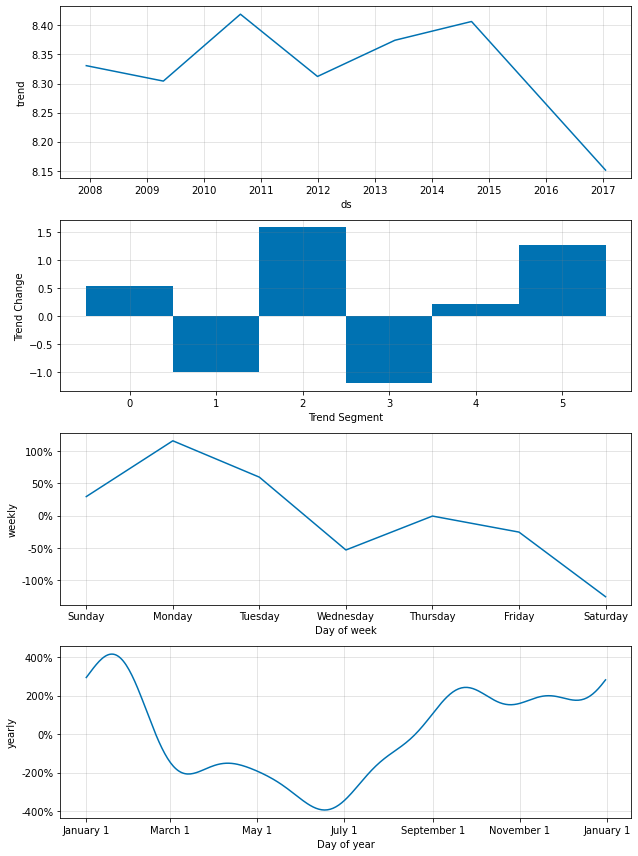

In [8]:
fig_comp = m.plot_components(forecast)

##  Underfit Additive Seasonality

In [9]:
m = NeuralProphet(
    yearly_seasonality=2,
    weekly_seasonality=1,
    daily_seasonality=False,
)
m.fit(df)

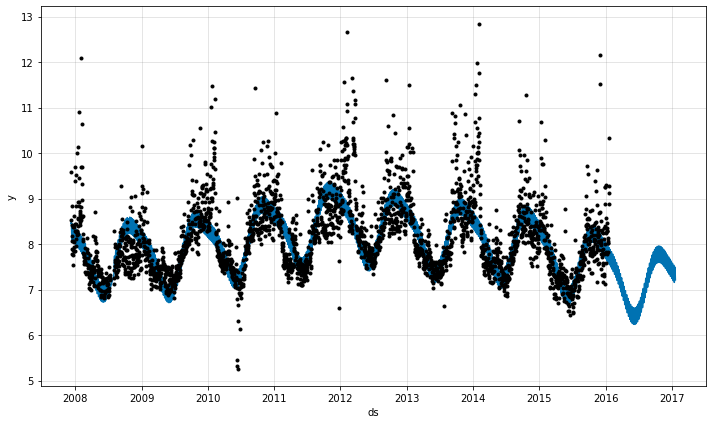

In [10]:
forecast = m.predict(future_periods=365)
fig_fit = m.plot(forecast)

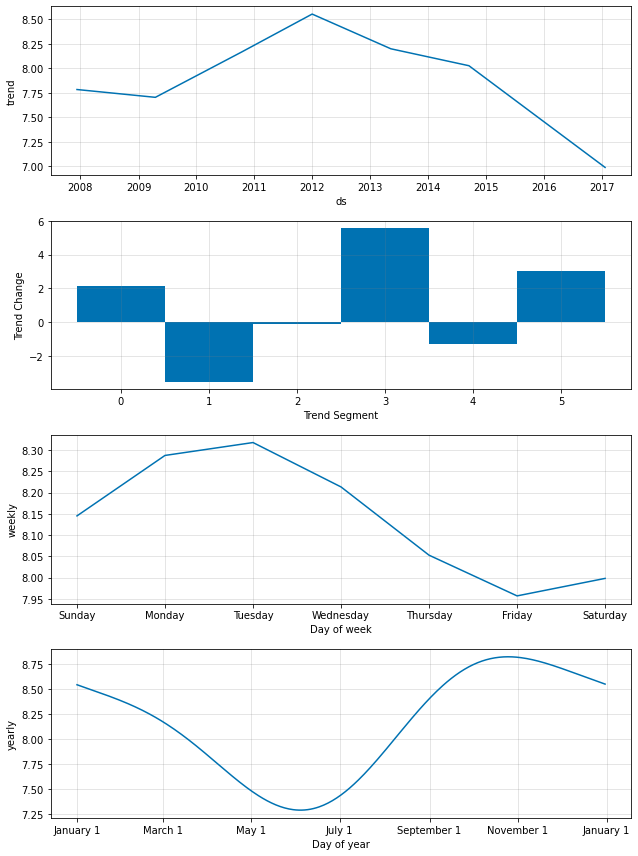

In [11]:
fig_comp = m.plot_components(forecast)

##  Overfit Additive Seasonality

In [12]:
m = NeuralProphet(
    yearly_seasonality=16,
    weekly_seasonality=8,
    daily_seasonality=False,
)
m.fit(df)

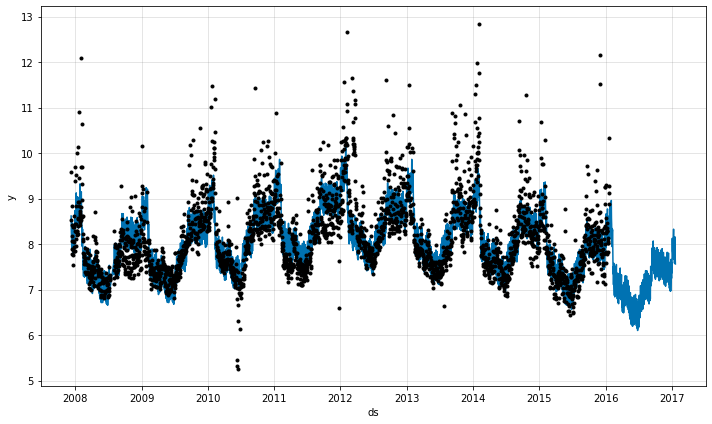

In [13]:
forecast = m.predict(future_periods=365)
fig_fit = m.plot(forecast)

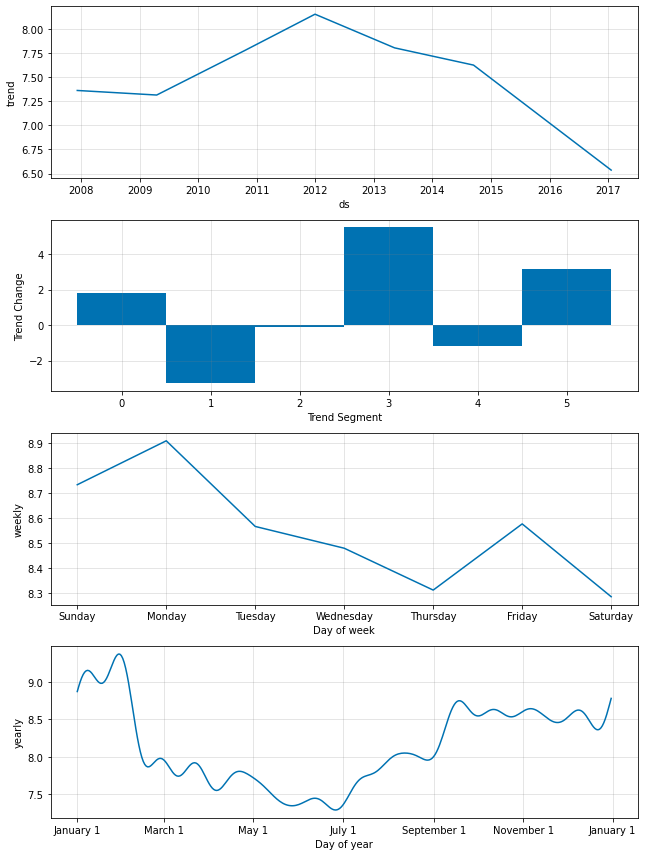

In [14]:
fig_comp = m.plot_components(forecast)

In [15]:
print(sum(abs(m.model.season_params["yearly"].data.numpy())))
print(sum(abs(m.model.season_params["weekly"].data.numpy())))

# print(m.model.season_params["yearly"].data)
# print(m.model.season_params["weekly"].data)

2.969950309023261
3.2850398756563663


##  Regularized Additive Seasonality

In [22]:
m = NeuralProphet(
    yearly_seasonality=16,
    weekly_seasonality=8,
    daily_seasonality=False,
    seasonality_reg=10,
)
m.fit(df)

NOTICE: A Regularization strength for the seasonal Fourier Terms was set.Please note that this feature is experimental.


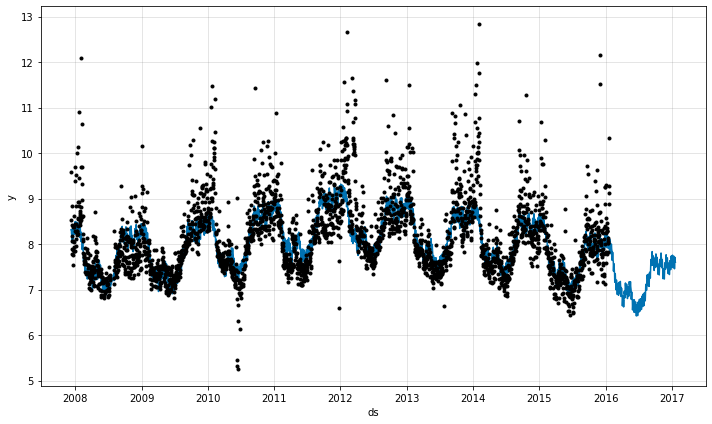

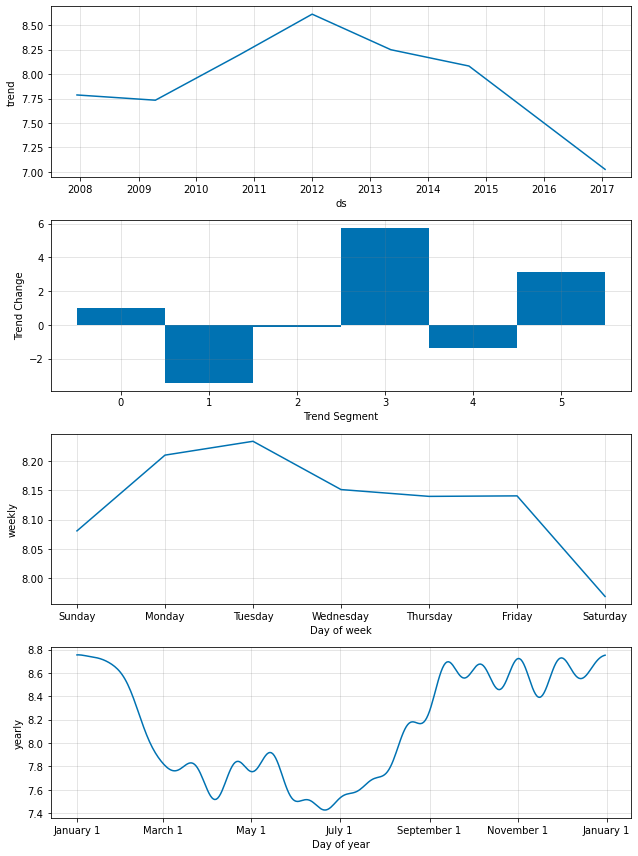

In [23]:
forecast = m.predict(future_periods=365)
fig_fit = m.plot(forecast)
fig_comp = m.plot_components(forecast)

In [24]:
print(sum(abs(m.model.season_params["yearly"].data.numpy())))
print(sum(abs(m.model.season_params["weekly"].data.numpy())))

# print(m.model.season_params["yearly"].data)
# print(m.model.season_params["weekly"].data)

1.950382444774732
0.3611199972219765
